In [14]:
#import the necessary libraries/packages

import pandas as pd
import numpy as np

In [15]:
#pandas has an option to read data from a text file, so let's use that

df = pd.read_csv('/Users/chidam/Desktop/3d_road_network_project/3D_spatial_network.txt', sep=",", header=None)

In [16]:
#let's give the columns some names to identify them

df.rename(columns={0: "mapid", 1:"longitude", 2:"latitude", 3:"height"}, inplace=True)

In [17]:
#how many values are negative in height

len(df.loc[df["height"]<0, "mapid"].unique())


77

In [18]:
df.head()

,mapid,longitude,latitude,height
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [19]:
#converting latitude and longitude into radians

df["longitude_radians"]=df["longitude"]*(180/3.14)

df["latitude_radians"]=df["latitude"]*(180/3.14)


In [20]:
df.head()

,mapid,longitude,latitude,height,longitude_radians,latitude_radians
0,144552912,9.349849,56.740876,17.052772,535.978582,3252.661664
1,144552912,9.350188,56.740679,17.614840,535.998061,3252.650360
2,144552912,9.350549,56.740544,18.083536,536.018704,3252.642678
3,144552912,9.350806,56.740484,18.279465,536.033454,3252.639239
4,144552912,9.351053,56.740486,18.422974,536.047647,3252.639342


In [21]:
len(df["mapid"].unique())

57329

In [ ]:
#maybe it cannot pull the data load the kernel is dying. this is not working but kmeans does

from sklearn.cluster import AgglomerativeClustering

# creates 5 clusters using hierarchical clustering.
agc = AgglomerativeClustering(n_clusters =55, affinity='euclidean', linkage='ward')
df['clusters'] = agc.fit_predict(df[['latitude_radians','longitude_radians']])


In [ ]:
# We can do pretty useful analysis using the clusters here. We shall figure out which mapids are in the same cluster and that
# info can be later used in other studies such as carbon emissions at certain altitudes.







In [51]:
df.head()

,mapid,longitude,latitude,height,longitude_radians,latitude_radians,cluster,cluster2
0,144552912,9.349849,56.740876,17.052772,535.978582,3252.661664,8,5
1,144552912,9.350188,56.740679,17.614840,535.998061,3252.650360,8,5
2,144552912,9.350549,56.740544,18.083536,536.018704,3252.642678,8,5
3,144552912,9.350806,56.740484,18.279465,536.033454,3252.639239,8,5
4,144552912,9.351053,56.740486,18.422974,536.047647,3252.639342,8,5


In [53]:
df.drop(["cluster","cluster2"], axis=1, inplace=True)

In [70]:
df_cluster=df[["longitude_radians","latitude_radians"]]

In [71]:
X1=df_cluster[:354874]
X2=df_cluster[354874:]

In [72]:
X_train=X1.values
X_test=X2.values

In [73]:
X_train

array([[ 535.97858217, 3252.66166433],
       [ 535.99806115, 3252.65035987],
       [ 536.01870382, 3252.64267834],
       ...,
       [ 536.77311592, 3269.29297643],
       [ 536.68535159, 3269.2873242 ],
       [ 536.66264522, 3269.28471592]])

In [74]:
X_test

array([[ 536.62795796, 3269.2808121 ],
       [ 536.58963631, 3269.27487898],
       [ 536.56979045, 3269.27026433],
       ...,
       [ 569.52283758, 3296.13719045],
       [ 570.00833312, 3295.94440127],
       [ 570.00675669, 3295.96452229]])

In [80]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)
label3=kmeans.labels_

In [81]:
predicted_label=kmeans.predict(X_test)

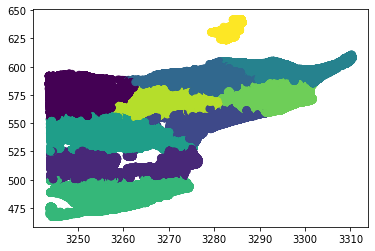

In [82]:
# Plot of 10 different clusters of latitude and longitude using KMeans

plt.scatter(X1['latitude_radians'].tolist(), X1['longitude_radians'].tolist(), c=label3, s=50, cmap='viridis');


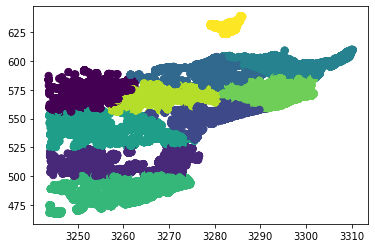

In [83]:
#Let's plot the predicted labels here. Looks like the unsupervised model has clustered the values in appropriate
#clusters.

#But this is exactly what we cannot be so sure about an unsupervised algorithm, i.e., whether it has clustered the values 
#accurately as there are no metrics to measure its performance.

#We can follow a few steps to address the above concerns:
1. We can find the optimum number of clusters using elbow method or silhouette method or gap analysis. On a high level
we plot the number of clusters against the error per each cluster. We can find the number of clusters where the error 
is the lowest.
2. K-means algorithm suffers from the curse of dimensionality therefore it is better to make sure that we have normalized 
the distance before clustering. It is possible to convert the latitude and longitude into x, y, and z coordinates. The 
logic is that the values closer to these are also closer in reality. Why convert to x, y, and z you ask? 
Well, Lat long coordinates have a problem that they are 2 features that represent a three dimensional space. This 
means that the long coordinate goes all around, which means the two most extreme values are actually very close 
together. 
This can be an issue when using Kmeans algorithm, so it is good to convert the values and then cluster them. Instead of 
clustering latitudes and longitudes directly, we are converting them into x, y, and z and then clustering.
3. With distance problem we can try dimensionality reduction using PCA and try clustering. Maybe it is possible to use 
this technique on the distance values we calculated for predicting the height. 


plt.scatter(X2['latitude_radians'].tolist(), X2['longitude_radians'].tolist(), c=predicted_label, s=50, cmap='viridis');



In [35]:
Tried Random Forest: here I used latitude and longitude values directly. 
#here using cluster labels as proxy for mapid. these cluster labels were claculated using the previous method so cannot 
#be sure re its accuracy
    
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [36]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [37]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [40]:
y_predict=regr.predict(X_test)

In [39]:
y_test

array([29.3524817 , 45.70255166, 25.77711332, ..., 26.88957148,
       29.98113701,  5.04264656])

In [41]:
len(y_predict)

86975

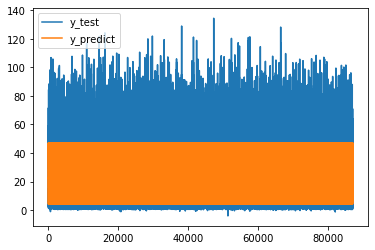

In [42]:
x=np.arange(86975)

plt.plot(x, y_test)
plt.plot(x, y_predict)

plt.legend(['y_test', 'y_predict'], loc='upper left')

plt.show()

#result:
still the predicted results are far off to the original values. But this here is a tad better compared to the linear 
regression models outcome

In [43]:
#trying with radian values of latitude and longitude instead, n_estimators=1000, and also with just 5 clusters

regr2 = RandomForestRegressor(max_depth=2, n_estimators=1000, random_state=0)

In [44]:
#here using cluster labels as proxy for mapid
X2=df[["longitude_radians","latitude_radians","cluster2"]].values

In [45]:
y2=df["height"].values

In [46]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)



In [47]:
regr2.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [48]:
y_predict2=regr.predict(X_test2)

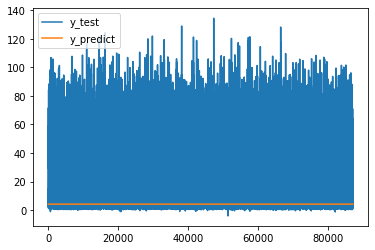

In [49]:
the combination of radians and cluster2 with 35 clusters did not work

x=np.arange(86975)

plt.plot(x, y_test2)
plt.plot(x, y_predict2)

plt.legend(['y_test', 'y_predict'], loc='upper left')

plt.show()




In [ ]:
further steps could be:
1. connecting the dots between what connects the latitude and longitude with height better will shed more light on 
figuring out better features to predict height. 

